In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

file_path = '/content/gdrive/My Drive/diabetes.csv'

df = pd.read_csv(file_path)
print(df.head())

print("Форма датасета (shape):")
print(df.shape)

print("\nПервые 5 строк (head):")
print(df.head())

print("\nОписание числовых признаков (describe):")
print(df.describe())

print("\nОбщая информация (info):")
print(df.info())

нормализация

In [ ]:
#разделение на признаки и целевую переменную
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# нормализация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Создание и обучение модели Random Forest

In [ ]:
#разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

#создание и обучение модели
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

обучение базового дерева решений

In [ ]:
base_dt = DecisionTreeClassifier(random_state=42)
base_dt.fit(X_train, y_train)

прогнозирование и оценка точности

In [ ]:
y_pred_base = base_dt.predict(X_test)

#оценка точности
accuracy_base = accuracy_score(y_test, y_pred_base)
print(f"Точность базового дерева на тесте: {accuracy_base:.4f}")

In [ ]:
from sklearn.tree import plot_tree
feature_names = X.columns.tolist()
class_names = sorted(y.astype(str).unique())

plt.figure(figsize=(20, 12))
plot_tree(base_dt,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True,
          max_depth=3)
plt.title("Базовое дерево решений (первые 3 уровня)")
plt.show()

Визуализация топ-5 признаков по важности (Decision Tree)

In [ ]:
# важность признаков из обученной модели
importances = base_dt.feature_importances_

# индексы признаков, отсортированных по убыванию важности
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Важность признаков (Decision Tree)")
plt.barh(range(5), importances[indices][:5], align='center')
plt.yticks(range(5), [X.columns[i] for i in indices[:5]])
plt.gca().invert_yaxis()
plt.xlabel('Важность признака')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Создаем и обучаем модель случайного леса

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

Прогнозирование и оценка эффективности

In [ ]:
y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Точность Случайного леса на тесте: {accuracy_rf:.4f}")

print("\n" + "="*50)
print("Отчет по классификации:")
print("="*50)
print(classification_report(y_test, y_pred_rf, target_names=['Не диабет', 'Диабет']))

Построение матрицы ошибок

In [ ]:
# Матрица ошибок
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Не диабет', 'Диабет'],
            yticklabels=['Не диабет', 'Диабет'])
plt.title('Матрица ошибок (Confusion Matrix)')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()

Визуализация топ-5 признаков по важности

In [ ]:
rf_importances = rf.feature_importances_

# по убыванию важности
indices_rf = np.argsort(rf_importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Топ-5 признаков (Случайный лес)")
plt.barh(range(5), rf_importances[indices_rf][:5], align='center')
plt.yticks(range(5), [X.columns[i] for i in indices_rf[:5]])
plt.gca().invert_yaxis()
plt.xlabel('Важность признака')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

 Настройка гиперпараметров Random Forest (GridSearchCV)

In [29]:
#сетка параметров
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#создание модели и поиска
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# поиск лучших параметров
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность (CV):", grid_search.best_score_)

best_rf_model = grid_search.best_estimator_

Лучшие параметры: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Лучшая точность (CV): 0.7817939490870319


Градиентный бустинг для оптимизации случайного леса

In [30]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Точность Gradient Boosting на тесте: {accuracy_gb:.4f}")

Точность Gradient Boosting на тесте: 0.7532


Сравнение всех моделей

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(



Сводная таблица результатов:
                     Train Accuracy  Test Accuracy
Base Decision Tree         1.000000       0.720779
Tuned Random Forest        0.902280       0.753247
Gradient Boosting          0.918567       0.753247


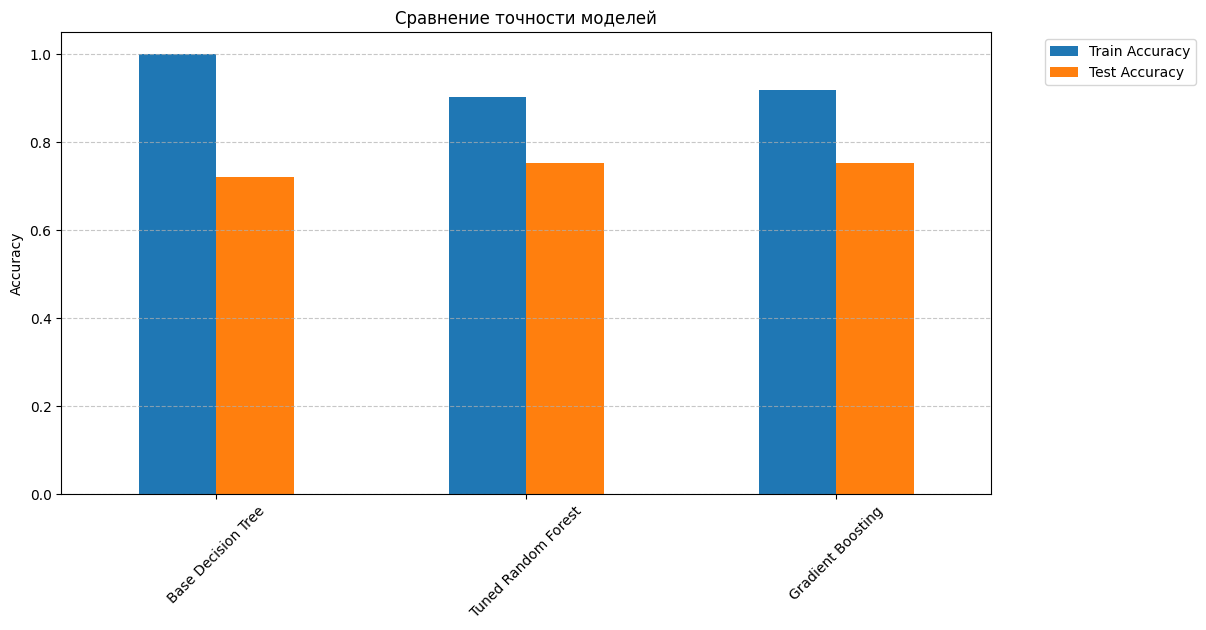

In [31]:
models = {
    'Base Decision Tree': base_dt,
    'Tuned Random Forest': best_rf_model,
    'Gradient Boosting': gb
}

results = {}

for name, model in models.items():
    # точность на обучающей выборке
    train_acc = accuracy_score(y_train, model.predict(X_train))
    #точность на тестовой выборке
    test_acc = accuracy_score(y_test, model.predict(X_test))
    results[name] = {'Train Accuracy': train_acc, 'Test Accuracy': test_acc}

results_df = pd.DataFrame(results).T
print("\nСводная таблица результатов:")
print(results_df)

results_df[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(12, 6))
plt.title("Сравнение точности моделей")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()